# **Practice project - Sentiment Analysis**


## **Objective**
This is a hands-on practice project (non-graded) where you will experiment with different sentiment analysis techniques, ranging from traditional machine learning (ML) models to modern prompt engineering. The goal is to test the models, evaluate their performance, and discuss findings with your peers.

---

## **Note**
- This notebook is  written on [google colab](https://colab.research.google.com/) and is designed to be run in a Jupyter notebook environment. You can also run it locally if you have the required libraries installed and RAM.

---

## **Instructions**

##### [Task 1: Load and Explore the Dataset](#load_data)
##### [Task 2: Build a Traditional ML Classifier](#trad_ml)

##### [Task 3: Experiment with a Traditional NLP](#nlp_ml)


##### [Task 4: Try a Transformer-Based Model](#transformer)


##### [Task 5: Explore Prompt Engineering](#prompt_eng)

##### [Task 6: Discussion & Insights](#discuss)

## **Deliverables**
- Code implementation for each task.
- Performance evaluation metrics for all approaches.
- A summary of findings and insights.

## **Expected Outcomes**
- A better understanding of sentiment analysis techniques.
- Insights into the strengths and weaknesses of different approaches.
- Hands-on experience with both traditional and modern NLP methods.

<a id="discuss"></a>
### Task 6: Discussion & Insights

After completing this sentiment analysis practice project, we can conclude the following:

1. I have worked with a dataset of **37 reviews data points** classified into two classes: **positive** and **negative**.
2. The dataset was **imbalanced**, so we used **SMOTE** to balance it for training traditional ML models.
3. We experimented with multiple models and observed their performance based on **accuracy, precision, recall, and F1-score**.

---

### 🧪 Model Performance Comparison

| Model No. | Model Description                                | Accuracy | F1 Score | Recall | Precision |
|-----------|--------------------------------------------------|----------|----------|--------|-----------|
| 1         | BOW + SVM Classifier                             | 0.37     | 0.54     | 0.75   | 0.43      |
| 2         | TF-IDF + Logistic Regression                     | 0.62     | 0.57     | 0.50   | 0.67      |
| 3         | Transformer-based model (BERT)                   | 0.78     | 0.75     | 0.87   | 0.67      |
| 4         | Prompt Engineering with Mistral-7B-Instruct-v0.1 | 0.97     | 0.96     | 0.97   | 1.00      |

---

### ✅ Final Conclusion

- Model performance **significantly improved** as we moved from traditional ML models to **transformer-based models**.
- The **Prompt Engineering approach using LLMs** (Mistral-7B-Instruct-v0.1) achieved **the best performance**, indicating that **LLMs are highly effective** even for small datasets when crafted prompts are used.
- This project highlights how **modern NLP techniques outperform classical models**, especially in **low-data** scenarios with well-designed prompts.
- Even though we tried to carefully give the prompt we still got some prediction out of desired categories. we can get it corrected through iterative improvement of prompt.


<a id="load_data"></a>
### Task 1: Load and Explore the Dataset

In [1]:
### import necessary libraries

import os
import pandas as pd
import numpy as np
import re

import seaborn as sns
from sklearn import svm


In [2]:
## read data file.

if os.path.exists('data.txt'):
    with open('data.txt' , 'r') as file:
        df = file.read()
else:
    print("File not found. Please check the file path.")
    exit()

print("Data read successfully.")


Data read successfully.


In [3]:
df.split("\n")[:6]

['("I love this product, it\'s amazing!", "positive"),',
 '("This is the worst experience ever.", "negative"),',
 '("Absolutely fantastic! Highly recommend.", "positive"),',
 '("Not good, really disappointing.", "negative"),',
 '("I am extremely happy with this.", "positive"),',
 '("Would never buy this again.", "negative"),']

In [4]:
### create function for getting data and lable

def get_data_and_lable(string):

    regex_pattern = '\("(.+?)",\s*"(.+?)"\)'
    match_regex = re.search(regex_pattern, string)

    if match_regex:
        document_str = match_regex.group(1)
        document_str = re.sub(r'[^A-Za-z0-9\s]', '', document_str)
        lable = match_regex.group(2)
    else:
        document_str = ''
        lable = np.nan

    return document_str, lable

In [5]:
X = [get_data_and_lable(line)[0] for line in df.split("\n")]
y = [get_data_and_lable(line)[1] for line in df.split("\n")]

Record count : 37
Class distribution : positive : 14 , negative: 23


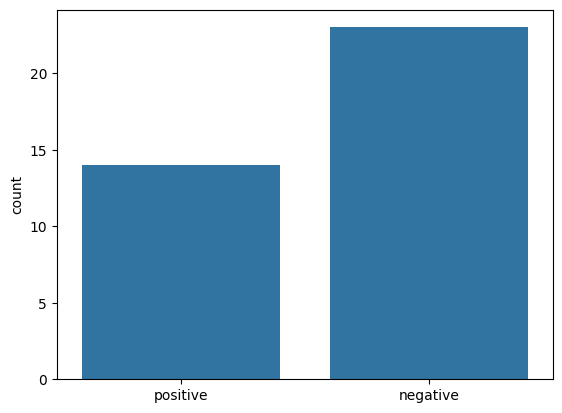

In [6]:
### exploratory analysis of the data
count = len(df.split("\n"))
print(f'Record count : {count}')

## understand classs distribution
sns.countplot(x=y)
print(f'Class distribution : positive : {y.count("positive")} , negative: {y.count("negative")}')

In [7]:
## Preprocessing of the data

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer


In [8]:

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
stemmer = SnowballStemmer('english')
word_toekns = []
for sentence in X:
    token = word_tokenize(sentence)
    token = [word.lower() for word in token if word not in stopwords.words('english')]
    token = [stemmer.stem(word) for word in token]
    word_toekns.append(token)

In [10]:
word_toekns[:10]

[['i', 'love', 'product', 'amaz'],
 ['this', 'worst', 'experi', 'ever'],
 ['absolut', 'fantast', 'high', 'recommend'],
 ['not', 'good', 'realli', 'disappoint'],
 ['i', 'extrem', 'happi'],
 ['would', 'never', 'buy'],
 ['it', 'okay', 'noth', 'special'],
 ['could', 'better', 'bad'],
 ['oh', 'wow', 'product', 'amaz', 'total', 'worth', 'everi', 'penni', 'not'],
 ['yeah', 'sure', 'best', 'purchas', 'life', 'said', 'one', 'ever']]

<a id="trad_ml"></a>
### Task 2: Build a Traditional ML Classifier


In [11]:
## featutre extraction using BoW.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_vectors = vectorizer.fit_transform(X)
print(f'Feature shape : {bow_vectors.shape}')


Feature shape : (37, 145)


Train data shape : (29, 145) , Test data shape : (8, 145)
distribution of classes after SMOTE


<Axes: ylabel='count'>

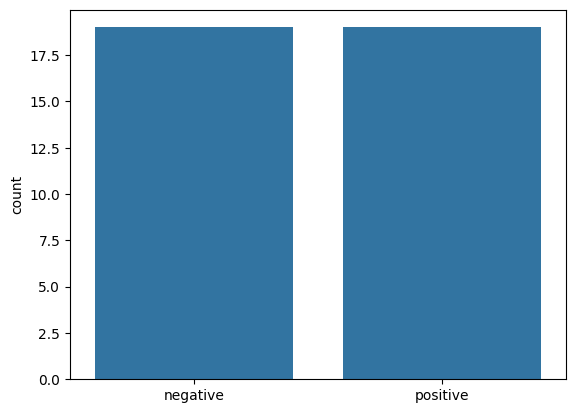

In [12]:
### create train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bow_vectors, y, test_size=0.2, random_state=42)
print(f'Train data shape : {X_train.shape} , Test data shape : {X_test.shape}')

## since we have seen class is imbalanced we will use SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print('distribution of classes after SMOTE')
sns.countplot(x=y_resampled)

In [13]:
### model training
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_resampled, y_resampled)

### model evaluation
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = svm_model.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'Precision : {precision_score(y_test, y_pred, pos_label="positive")}')
print(f'Recall : {recall_score(y_test, y_pred, pos_label="positive")}')
print(f'F1 Score : {f1_score(y_test, y_pred, pos_label="positive")}')



Accuracy : 0.375
Precision : 0.42857142857142855
Recall : 0.75
F1 Score : 0.5454545454545454


<a id="nlp_ml"></a>
### Task 3: Experiment with a Traditional NLP

In [14]:
## featutre extraction using BoW.
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectors = tf_idf_vectorizer.fit_transform(X)
print(f'Feature shape : {tf_idf_vectors.shape}')


Feature shape : (37, 145)


In [15]:
### trin test split with SNOTE to balance the data
X_train, X_test, y_train, y_test = train_test_split(tf_idf_vectors, y, test_size=0.2, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [16]:
### model training
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_resampled, y_resampled)

### model evaluation
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = logit_model.predict(X_test)
print(f'Accuracy : {accuracy_score(y_test, y_pred)}')
print(f'Precision : {precision_score(y_test, y_pred, pos_label="positive")}')
print(f'Recall : {recall_score(y_test, y_pred, pos_label="positive")}')
print(f'F1 score : {f1_score(y_test, y_pred, pos_label="positive")}')



Accuracy : 0.625
Precision : 0.6666666666666666
Recall : 0.5
F1 score : 0.5714285714285714


<a id="transformer"></a>
### Task 4: Try a Transformer-Based Model

In [17]:
from transformers import pipeline

# Loading model for sentiment analysis with BERT-based model
## light BERT model is used for matching system requirements - it has 95% of the performance of BERT
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

# Predict using model
prediction = [sentiment_pipeline(text) for text in X]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [18]:
y_pred = np.array([x[0]['label'].lower() for x in prediction])
y_actual = np.array(y)
print(f'Accuracy : {accuracy_score(y_actual, y_pred)}')
print(f'Precision : {precision_score(y_actual, y_pred, pos_label="positive")}')
print(f'Recall : {recall_score(y_actual, y_pred, pos_label="positive")}')
print(f'F1 score : {f1_score(y_actual, y_pred, pos_label="positive")}')


Accuracy : 0.7837837837837838
Precision : 0.6666666666666666
Recall : 0.8571428571428571
F1 score : 0.75


<a id="prompt_eng"></a>
### Task 5: Explore Prompt Engineering

In [19]:
## we will be using hugging face LLaMA 2 model
## login is mandatory to acces non public models.
from huggingface_hub import login
login("add your access token from hugging face")

from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_name = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")



tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

In [41]:
## create prompts.

few_shot_prompt = """
you are a sentiment classifier. classify the statment's sentiment as either positive or negative no other value is allowed.
Example 1:
Review: This movie was amazing!
Sentiment: positive

Example 2:
Review: I hated the food.
Sentiment: negative

Review:"""

output_str = "\n##Sentiment:"

In [42]:
prediction = []

tokenizer.pad_token = tokenizer.eos_token

for user_input in X:
  input_prompt = few_shot_prompt + user_input + output_str

  inputs = tokenizer(
      input_prompt,
      return_tensors="pt",
      padding=True
  ).to("cuda")

  input_ids = inputs["input_ids"]

  attention_mask = inputs["attention_mask"]

  output = model.generate(
      input_ids=input_ids,
      attention_mask=attention_mask,
      max_new_tokens=5,
      num_return_sequences=1,
      pad_token_id=tokenizer.eos_token_id
  )
  prediction.append(tokenizer.decode(output[0], skip_special_tokens=True))


In [51]:
prediction_sentiment = [x.split("\n##Sentiment:")[1] for x in prediction]

In [50]:
cat_prediction = [re.sub('\n|\s+|Review:|Example', '', x) for x in prediction_sentiment]
print(cat_prediction)

['positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'neutral', 'neutral', 'negative', 'negative', 'negative', 'negative', 'negative', 'neutral', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'neutral', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative']


In [54]:
## manually calculated confusion metrics, since even when we are specifying prompt to give only two categories
## we are getting more.
def calculate_scores(actual, predicted, positive_label="positive"):
    TP = TN = FP = FN = 0

    for a, p in zip(actual, predicted):
        if a == positive_label:
            if p == positive_label:
                TP += 1
            else:
                FN += 1
        elif a != positive_label:
            if p != positive_label:
                TN += 1
            else:
                FP += 1

    # Calculate metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) else 0
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

    return {
        "Accuracy": round(accuracy, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1 Score": round(f1_score, 4)
    }


In [55]:
calculate_scores(y, cat_prediction)

{'Accuracy': 0.973, 'Precision': 1.0, 'Recall': 0.9286, 'F1 Score': 0.963}